In [1]:
import csv
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Load data from the train data csv file
Feature = []
Label = []
with open('data/train/train.csv', 'r') as f:
    reader = csv.reader(f)
    train_data = list(reader)
    # remove the first row
    train_data = train_data[1:]
    for row in train_data:
        Feature.append(np.array([float(x) for x in row[1:-1]]))
        Label.append(row[-1])  
Features = np.array(Feature)
Labels = np.array(Label)

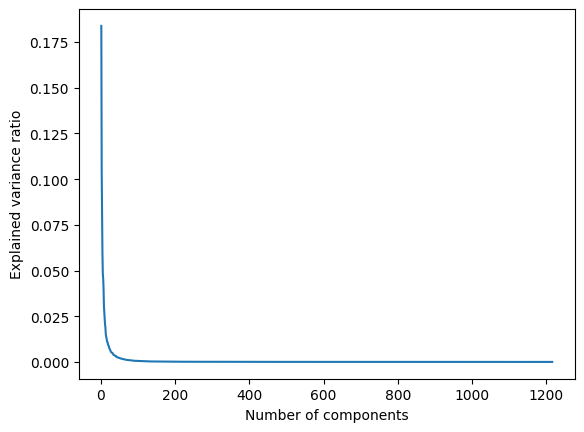

The optimal number of components for PCA is 90


In [3]:
# perform the elbow method to find the optimal number of components for PCA
pca = PCA()
pca.fit(Features)
explained_variance_ratio = pca.explained_variance_ratio_
# plot the explained variance ratio against the number of components for PCA
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()
# find the optimal number of components for PCA
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_number_of_components_pca = np.argmax(cumulative_explained_variance_ratio > 0.95) + 1
print('The optimal number of components for PCA is', optimal_number_of_components_pca)

In [4]:
# perform PCA on the train data with the optimal number of components
pca = PCA(n_components=optimal_number_of_components_pca)
pca.fit(Features)
Features = pca.transform(Features)

In [5]:
# perform logistic regression on the train data with maximum iterations of 10000
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(Features, Labels)

LogisticRegression(max_iter=10000)

In [6]:
with open('data/test/test.csv', 'r' ) as f:
    reader = csv.reader(f)
    test_data = list(reader)
    test_data = test_data[1:]
    test_features = []
    for row in test_data:
        test_features.append(np.array([float(x) for x in row[1:]]))
    test_features = np.array(test_features)
    test_features = pca.transform(test_features)
    test_labels = logistic_regression.predict(test_features)
    with open('data/test/submission_31_results.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Id', 'Category'])
        for i in range(len(test_labels)):
            writer.writerow([i, test_labels[i]])